# Preprocessing

Imports

In [ ]:
import numpy             as np
import matplotlib.pyplot as plt
import tensorflow        as tf
import pickle

Importing Drive and unzipinig the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!unzip drive/MyDrive/Eye/NewEye

Mounted at /content/drive
Archive:  drive/MyDrive/Eye/NewEye.zip
   creating: NewEye/
   creating: NewEye/test/
   creating: NewEye/test/AMD/
  inflating: NewEye/test/AMD/AMRD46.jpeg  
  inflating: NewEye/test/AMD/AMRD47.jpeg  
  inflating: NewEye/test/AMD/AMRD48.jpeg  
  inflating: NewEye/test/AMD/AMRD49.jpeg  
  inflating: NewEye/test/AMD/AMRD50.jpeg  
  inflating: NewEye/test/AMD/AMRD51.jpeg  
  inflating: NewEye/test/AMD/AMRD52.jpeg  
  inflating: NewEye/test/AMD/AMRD53.jpeg  
  inflating: NewEye/test/AMD/AMRD54.jpeg  
  inflating: NewEye/test/AMD/AMRD55.jpeg  
   creating: NewEye/test/CSR/
  inflating: NewEye/test/CSR/CSR100.jpeg  
  inflating: NewEye/test/CSR/CSR101.jpeg  
  inflating: NewEye/test/CSR/CSR102.jpeg  
  inflating: NewEye/test/CSR/CSR93.jpeg  
  inflating: NewEye/test/CSR/CSR94.jpeg  
  inflating: NewEye/test/CSR/CSR95.jpeg  
  inflating: NewEye/test/CSR/CSR96.jpeg  
  inflating: NewEye/test/CSR/CSR97.jpeg  
  inflating: NewEye/test/CSR/CSR98.jpeg  
  inflating: NewE

Determining the batch size

In [ ]:
batch_size = 2

Defining the data generators

In [ ]:
AMD_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale            = 1./255,
    rotation_range     = 8,
    width_shift_range  = 0.1,
    height_shift_range = 0.1
)

CSR_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale            = 1./255,
    rotation_range     = 8,
    width_shift_range  = 0.1,
    height_shift_range = 0.1
)

DR_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale            = 1./255,
    rotation_range     = 8,
    width_shift_range  = 0.1,
    height_shift_range = 0.1
)

MH_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale            = 1./255,
    rotation_range     = 8,
    width_shift_range  = 0.1,
    height_shift_range = 0.1
)

NORMAL_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale            = 1./255,
    rotation_range     = 8,
    width_shift_range  = 0.1,
    height_shift_range = 0.1
)

In [ ]:
AMD_data = AMD_datagen.flow_from_directory(
    'NewEye/train/AMDD',
    # target_size = (832,576),
    target_size = (416,288),
    batch_size  = batch_size,
    color_mode  = "grayscale",
    class_mode  = None,
    shuffle     = True
)

Found 45 images belonging to 1 classes.


In [ ]:
CSR_data = CSR_datagen.flow_from_directory(
    'NewEye/train/CSRD',
    target_size = (416,288),
    batch_size  = batch_size,
    color_mode  = "grayscale",
    class_mode  = None,
    shuffle     = True
)

Found 92 images belonging to 1 classes.


In [ ]:
DR_data = DR_datagen.flow_from_directory(
    'NewEye/train/DRD',
    target_size = (416,288),
    batch_size  = batch_size,
    color_mode  = "grayscale",
    class_mode  = None,
    shuffle     = True
)

Found 97 images belonging to 1 classes.


In [ ]:
MH_data = MH_datagen.flow_from_directory(
    'NewEye/train/MHD',
    target_size = (416,288),
    batch_size  = batch_size,
    color_mode  = "grayscale",
    class_mode  = None,
    shuffle     = True
)

Found 92 images belonging to 1 classes.


In [ ]:
NORMAL_data = NORMAL_datagen.flow_from_directory(
    'NewEye/train/NORMALD',
    target_size = (416,288),
    batch_size  = batch_size,
    color_mode  = "grayscale",
    class_mode  = None,
    shuffle     = True
)

Found 196 images belonging to 1 classes.


In [ ]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale            = 1./255
)

test_data = test_datagen.flow_from_directory(
    'NewEye/test',
    target_size = (416,288),
    batch_size  = batch_size,
    color_mode  = "grayscale",
    class_mode  = "categorical",
)

Found 50 images belonging to 11 classes.


#Building the Model

Defining the Custom Activation Function

In [ ]:
# custom activation function
def custom_activation(output):
  logexpsum = tf.keras.backend.sum(tf.keras.backend.exp(output), axis=-1, keepdims=True)
  result    = logexpsum / (logexpsum + 1.0)

  return result

Defining Discriminator and the Classification model

In [ ]:
def define_discriminator(in_shape=(416,288,1), n_classes = 5):
  in_image = tf.keras.layers.Input(shape=in_shape)

  fe = tf.keras.layers.Conv2D(128, (3,3), strides = (1,1), padding = "same")(in_image)
  fe = tf.keras.layers.MaxPool2D(pool_size = (2,2) , strides = (2,2))(fe)
  fe = tf.keras.layers.LeakyReLU(alpha=0.2)(fe)

  fe = tf.keras.layers.Dropout(0.5)(fe)

  fe = tf.keras.layers.Conv2D(128, (3,3), strides = (1,1), padding = "same")(fe)
  fe = tf.keras.layers.MaxPool2D(pool_size = (2,2) , strides = (2,2))(fe)
  fe = tf.keras.layers.LeakyReLU(alpha=0.2)(fe)

  fe = tf.keras.layers.Dropout(0.5)(fe)

  fe = tf.keras.layers.Conv2D(128, (3,3), strides = (1,1), padding = "same")(fe)
  fe = tf.keras.layers.MaxPool2D(pool_size = (2,2) , strides = (2,2))(fe)
  fe = tf.keras.layers.LeakyReLU(alpha=0.2)(fe)

  fe = tf.keras.layers.Dropout(0.5)(fe)

  fe = tf.keras.layers.Conv2D(128, (3,3), strides = (1,1), padding = "same")(fe)
  fe = tf.keras.layers.MaxPool2D(pool_size = (2,2) , strides = (2,2))(fe)
  fe = tf.keras.layers.LeakyReLU(alpha=0.2)(fe)

  fe = tf.keras.layers.Dropout(0.5)(fe)

  fe = tf.keras.layers.Conv2D(128, (3,3), strides = (1,1), padding = "same")(fe)
  fe = tf.keras.layers.MaxPool2D(pool_size = (2,2) , strides = (2,2))(fe)
  fe = tf.keras.layers.LeakyReLU(alpha=0.2)(fe)

  # fe = tf.keras.layers.Conv2D(128, (3,3), strides = (1,1), padding = "same")(fe)
  # fe = tf.keras.layers.MaxPool2D(pool_size = (2,2) , strides = (2,2))(fe)
  # fe = tf.keras.layers.LeakyReLU(alpha=0.2)(fe)

  fe = tf.keras.layers.Flatten()(fe)
  fe = tf.keras.layers.Dropout(0.4)(fe)
  fe = tf.keras.layers.Dense(n_classes)(fe)

  c_out_layer = tf.keras.layers.Activation("softmax")(fe)
  c_model     = tf.keras.models.Model(in_image, c_out_layer)
  c_model.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00002,  beta_1 = 0.5), metrics = ["accuracy"])

  d_out_layer = tf.keras.layers.Lambda(custom_activation)(fe)
  d_model     = tf.keras.models.Model(in_image, d_out_layer)
  d_model.compile(loss = "binary_crossentropy", optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00002, beta_1 = 0.5))
  return d_model, c_model

Defining the Generator

In [ ]:
def define_generator(latent_dim):
  in_lat  = tf.keras.layers.Input(shape=(latent_dim,))
  n_nodes = 128 * 13 * 9

  gen = tf.keras.layers.Dense(n_nodes)(in_lat)
  gen = tf.keras.layers.LeakyReLU(alpha = 0.2)(gen)
  gen = tf.keras.layers.Reshape((13, 9, 128))(gen)

  gen = tf.keras.layers.Conv2DTranspose(128, (4,4), strides = (2,2), padding = "same")(gen)
  gen = tf.keras.layers.LeakyReLU(alpha = 0.2)(gen)

  gen = tf.keras.layers.Conv2DTranspose(128, (4,4), strides = (2,2), padding = "same")(gen)
  gen = tf.keras.layers.LeakyReLU(alpha = 0.2)(gen)

  gen = tf.keras.layers.Conv2DTranspose(128, (4,4), strides = (2,2), padding = "same")(gen)
  gen = tf.keras.layers.LeakyReLU(alpha = 0.2)(gen)

  gen = tf.keras.layers.Conv2DTranspose(128, (4,4), strides = (2,2), padding = "same")(gen)
  gen = tf.keras.layers.LeakyReLU(alpha = 0.2)(gen)

  gen = tf.keras.layers.Conv2DTranspose(128, (4,4), strides = (2,2), padding = "same")(gen)
  gen = tf.keras.layers.LeakyReLU(alpha = 0.2)(gen)

  # gen = tf.keras.layers.Conv2DTranspose(128, (4,4), strides = (2,2), padding = "same")(gen)
  # gen = tf.keras.layers.LeakyReLU(alpha = 0.2)(gen)

  out_layer = tf.keras.layers.Conv2D(1, (7,7), activation = "tanh", padding = "same")(gen)

  model = tf.keras.models.Model(in_lat, out_layer)
  return model

Defining GAN

In [ ]:
def define_gan(g_model, d_model):
  d_model.trainable = False

  gan_output = d_model(g_model.output)
  model      = tf.keras.models.Model(g_model.input, gan_output)
  opt        = tf.keras.optimizers.Adam(learning_rate = 0.0002, beta_1 = 0.5)
  model.compile(loss="binary_crossentropy", optimizer=opt)

  return model

How to generate real samples

In [ ]:
def generate_real_samples():
  X_AMD    = AMD_data.next()
  Y_AMD    = np.array([1,0,0,0,0] * X_AMD.shape[0]).reshape(X_AMD.shape[0], -1)
  X_CSR    = CSR_data.next()
  Y_CSR    = np.array([0,1,0,0,0] * X_CSR.shape[0]).reshape(X_CSR.shape[0], -1)
  X_DR     = DR_data.next()
  Y_DR     = np.array([0,0,1,0,0] * X_DR.shape[0]).reshape(X_DR.shape[0], -1)
  X_MH     = MH_data.next()
  Y_MH     = np.array([0,0,0,1,0] * X_MH.shape[0]).reshape(X_MH.shape[0], -1)
  X_NORMAL = NORMAL_data.next()
  Y_NORMAL = np.array([0,0,0,0,1] * X_NORMAL.shape[0]).reshape(X_NORMAL.shape[0], -1)

  X       = np.concatenate([X_AMD, X_CSR, X_DR, X_MH, X_NORMAL])
  labels  = np.concatenate([Y_AMD, Y_CSR, Y_DR, Y_MH, Y_NORMAL])
  y       = np.ones((X.shape[0], 1))

  return [X, labels], y

How to generate fake samples

In [ ]:
def generate_latent_points(latent_dim, n_samples):
  z_input = np.random.randn(latent_dim * n_samples)
  z_input = z_input.reshape(n_samples, latent_dim)
  return z_input

def generate_fake_samples(generator, latent_dim, n_samples):
  z_input = generate_latent_points(latent_dim, n_samples)
  images  = generator.predict(z_input)
  y       = np.zeros((n_samples, 1))
  return images, y

#Training the Model

Defining the train function

In [ ]:
def train(g_model, d_model, c_model, gan_model, latent_dim, n_epochs , batch_size):
  bat_per_epo = int(522/(5*batch_size))

  for i in range(bat_per_epo * n_epochs):
    [Xsup_real, ysup_real], y_real = generate_real_samples()
    c_loss, c_acc                  = c_model.train_on_batch(Xsup_real, ysup_real)

    d_loss1        = d_model.train_on_batch(Xsup_real, y_real)
    X_fake, y_fake = generate_fake_samples(g_model, latent_dim, 5 * batch_size)
    d_loss2        = d_model.train_on_batch(X_fake, y_fake)

    X_gan, y_gan = generate_latent_points(latent_dim, 5 * batch_size), np.ones((5 * batch_size, 1))
    g_loss       = gan_model.train_on_batch(X_gan, y_gan)

    print(">%d, c[%.3f,%.0f], d[%.3f,%.3f], g[%.3f]" % (i+1, c_loss, c_acc*100, d_loss1, d_loss2, g_loss))

  return c_model.evaluate(test_data)

Defining the models and latent dimension

In [ ]:
latent_dim = 150

d_model, c_model = define_discriminator()
g_model          = define_generator(latent_dim)
gan_model        = define_gan(g_model, d_model)

Loading model weights

In [ ]:
d_model.load_weights('/content/drive/MyDrive/GAN_weights_NEW/saved_model/c_model/w')
c_model.load_weights('/content/drive/MyDrive/GAN_weights_NEW/saved_model/d_model/w')
g_model.load_weights('/content/drive/MyDrive/GAN_weights_NEW/saved_model/g_model/w')

Training the model and saving the Accuracy and Loss of test data in history

In [ ]:
history = []

In [ ]:
with open('/content/drive/MyDrive/GAN_weights_NEW/pickle/history.pkl', 'rb') as f:
  history = pickle.load(f)

In [ ]:
for i in range(100):
  history.append(train(g_model, d_model, c_model, gan_model, latent_dim, n_epochs = 1, batch_size = batch_size))

>1, c[1.657,30], d[0.158,1.793], g[0.182]
>2, c[1.586,30], d[0.145,1.793], g[0.182]
>3, c[1.617,30], d[0.144,1.796], g[0.182]
>4, c[1.750,10], d[0.134,1.800], g[0.181]
>5, c[1.830,10], d[0.121,1.803], g[0.180]
>6, c[1.696,10], d[0.105,1.814], g[0.178]
>7, c[1.636,20], d[0.109,1.832], g[0.174]
>8, c[1.707,20], d[0.100,1.863], g[0.170]
>9, c[1.652,10], d[0.104,1.926], g[0.163]
>10, c[1.547,20], d[0.107,2.001], g[0.155]
>11, c[1.652,30], d[0.122,2.075], g[0.152]
>12, c[1.599,20], d[0.132,2.169], g[0.168]
>13, c[1.737,10], d[0.160,1.911], g[0.207]
>14, c[1.549,30], d[0.176,1.658], g[0.321]
>15, c[1.712,10], d[0.185,1.207], g[0.390]
>16, c[1.665,0], d[0.225,1.367], g[0.337]
>17, c[1.727,10], d[0.244,1.531], g[0.252]
>18, c[1.683,10], d[0.266,1.625], g[0.218]
>19, c[1.656,10], d[0.242,1.696], g[0.205]
>20, c[1.623,30], d[0.259,1.719], g[0.197]
>21, c[1.610,30], d[0.256,1.743], g[0.193]
>22, c[1.791,20], d[0.253,1.755], g[0.190]
>23, c[1.525,33], d[0.250,1.762], g[0.189]
>24, c[1.726,20], d[0

InvalidArgumentError: ignored

Saving Weights

In [ ]:
d_model.save_weights('/content/drive/MyDrive/GAN_weights_NEW/saved_model/c_model/w')
c_model.save_weights('/content/drive/MyDrive/GAN_weights_NEW/saved_model/d_model/w')
g_model.save_weights('/content/drive/MyDrive/GAN_weights_NEW/saved_model/g_model/w')

with open('/content/drive/MyDrive/GAN_weights_NEW/pickle/history.pkl', 'wb') as f:
  pickle.dump(history, f)

# Testing Generative Model

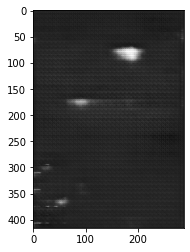

In [ ]:
fake = g_model.predict(generate_latent_points(100, 1))
plt.imshow(fake[0,:,:,0], cmap= "gray")

In [ ]:
test_AMDgen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale            = 1./255,
)

test_AMD = test_AMDgen.flow_from_directory(
    'NewEye/test/AMDD',
    target_size = (416,288),
    batch_size  = batch_size * 4,
    color_mode  = "grayscale",
    class_mode  = None,
)

test_CSRgen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale            = 1./255,
)

test_CSR = test_CSRgen.flow_from_directory(
    'NewEye/test/CSRD',
    target_size = (416,288),
    batch_size  = batch_size * 4,
    color_mode  = "grayscale",
    class_mode  = None,
)

test_DRgen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale            = 1./255,
)

test_DR = test_DRgen.flow_from_directory(
    'NewEye/test/DRD',
    target_size = (416,288),
    batch_size  = batch_size * 4,
    color_mode  = "grayscale",
    class_mode  = None,
)

test_NORMALgen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale            = 1./255,
)

test_NORMAL = test_NORMALgen.flow_from_directory(
    'NewEye/test/NORMALD',
    target_size = (416,288),
    batch_size  = batch_size * 4,
    color_mode  = "grayscale",
    class_mode  = None,
)

test_MHgen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale            = 1./255,
)

test_MH = test_MHgen.flow_from_directory(
    'NewEye/test/MHD',
    target_size = (416,288),
    batch_size  = batch_size * 4,
    color_mode  = "grayscale",
    class_mode  = None,
)

Found 10 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
Found 10 images belonging to 1 classes.
Found 10 images belonging to 1 classes.


In [ ]:
predictAMD = c_model.predict(test_AMD)
predictNORMAL = c_model.predict(test_NORMAL)
predictDR = c_model.predict(test_DR)
predictCSR = c_model.predict(test_CSR)
predictMH = c_model.predict(test_MH)

predictAMD = [np.argmax(i) for i in predictAMD]
predictNORMAL = [np.argmax(i) for i in predictNORMAL]
predictDR = [np.argmax(i) for i in predictDR]
predictCSR = [np.argmax(i) for i in predictCSR]
predictMH = [np.argmax(i) for i in predictMH]

In [ ]:
true_AMD    = np.array([0] * 10)
true_NORMAL = np.array([4] * 10)
true_CSR    = np.array([1] * 10)
true_DR     = np.array([2] * 10)
true_MH     = np.array([3] * 10)

In [ ]:
AMDmetrics = tf.keras.metrics.Accuracy()
AMDmetrics.update_state(true_AMD, predictAMD)
NORMALmetrics = tf.keras.metrics.Accuracy()
NORMALmetrics.update_state(true_NORMAL, predictNORMAL)
CSRmetrics = tf.keras.metrics.Accuracy()
CSRmetrics.update_state(true_CSR, predictCSR)
DRmetrics = tf.keras.metrics.Accuracy()
DRmetrics.update_state(true_DR, predictDR)
MHmetrics = tf.keras.metrics.Accuracy()
MHmetrics.update_state(true_MH, predictMH)
print(f"AMD: {AMDmetrics.result().numpy()}, CSR: {CSRmetrics.result().numpy()}, NORMAL: {NORMALmetrics.result().numpy()}, DR: {DRmetrics.result().numpy()}, MH: {MHmetrics.result().numpy()}")

AMD: 0.800000011920929, CSR: 0.6000000238418579, NORMAL: 1.0, DR: 0.10000000149011612, MH: 0.0
